In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

In [2]:
df = pd.read_csv('Water_potability.csv')
print(df)

            ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.88535

In [3]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
# count the number of missing values in each row
missing_values_count = df.isnull().sum(axis=1)

# identify rows with more than two missing values
condition = missing_values_count > 2
rows_with_more_than_two_missing_values = df[condition]

# calculate the number of rows with more than two missing values
num_rows_with_more_than_two_missing_values = condition.sum()

# print the result
print(f"There are {num_rows_with_more_than_two_missing_values} rows with more than two missing values:\n")
print(rows_with_more_than_two_missing_values)

# drop the rows with more than two missing values
df = df.drop(rows_with_more_than_two_missing_values.index)

# confirm the rows have been removed
print(f"\n{num_rows_with_more_than_two_missing_values} rows have been removed. The new DataFrame has {len(df)} rows.")

There are 9 rows with more than two missing values:

      ph    Hardness        Solids  Chloramines  Sulfate  Conductivity  \
141  NaN  167.386127  20944.620814     4.963124      NaN    566.339294   
201  NaN  229.771350  16162.262307     4.933662      NaN    448.846036   
387  NaN  143.300200  16263.167465     6.229737      NaN    503.664085   
646  NaN  221.620058  11954.700730     6.657053      NaN    391.238714   
929  NaN  202.079864  12519.090660     7.627524      NaN    399.883388   
992  NaN  226.765646  39942.953898     8.594715      NaN    538.621803   
2065 NaN  184.993731  19764.627445     7.505092      NaN    293.477998   
3062 NaN  209.531697  44982.734155     8.898024      NaN    349.385235   
3067 NaN  193.091260  17777.100086     6.087949      NaN    543.114953   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
141        11.318807              NaN   3.679795           0  
201         8.816487              NaN   4.600928           0  
387        19.585

In [5]:
# checking for missing values
df.isnull().sum()

# filling missing values with mean of respective columns
df = df.fillna(df.mean())

# checking the data types of columns
df.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [6]:
# checking for missing values again
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075905,-0.082068,-0.031845,0.014403,0.017223,0.040110,0.002994,-0.036250,-0.003290
Hardness,0.075905,1.000000,-0.047814,-0.030674,-0.092854,-0.023414,0.004719,-0.012702,-0.015414,-0.012768
Solids,-0.082068,-0.047814,1.000000,-0.072385,-0.150178,0.013918,0.009512,-0.008895,0.018824,0.034327
Chloramines,-0.031845,-0.030674,-0.072385,1.000000,0.023816,-0.019203,-0.013751,0.016644,0.002106,0.023779
Sulfate,0.014403,-0.092854,-0.150178,0.023816,1.000000,-0.014085,0.026942,-0.025605,-0.009798,-0.020640
Conductivity,0.017223,-0.023414,0.013918,-0.019203,-0.014085,1.000000,0.021542,0.001257,0.004976,-0.008150
Organic_carbon,0.040110,0.004719,0.009512,-0.013751,0.026942,0.021542,1.000000,-0.012992,-0.026861,-0.031821
Trihalomethanes,0.002994,-0.012702,-0.008895,0.016644,-0.025605,0.001257,-0.012992,1.000000,-0.021519,0.006967
Turbidity,-0.036250,-0.015414,0.018824,0.002106,-0.009798,0.004976,-0.026861,-0.021519,1.000000,0.001792
Potability,-0.003290,-0.012768,0.034327,0.023779,-0.020640,-0.008150,-0.031821,0.006967,0.001792,1.000000


(10.0, 0.0)

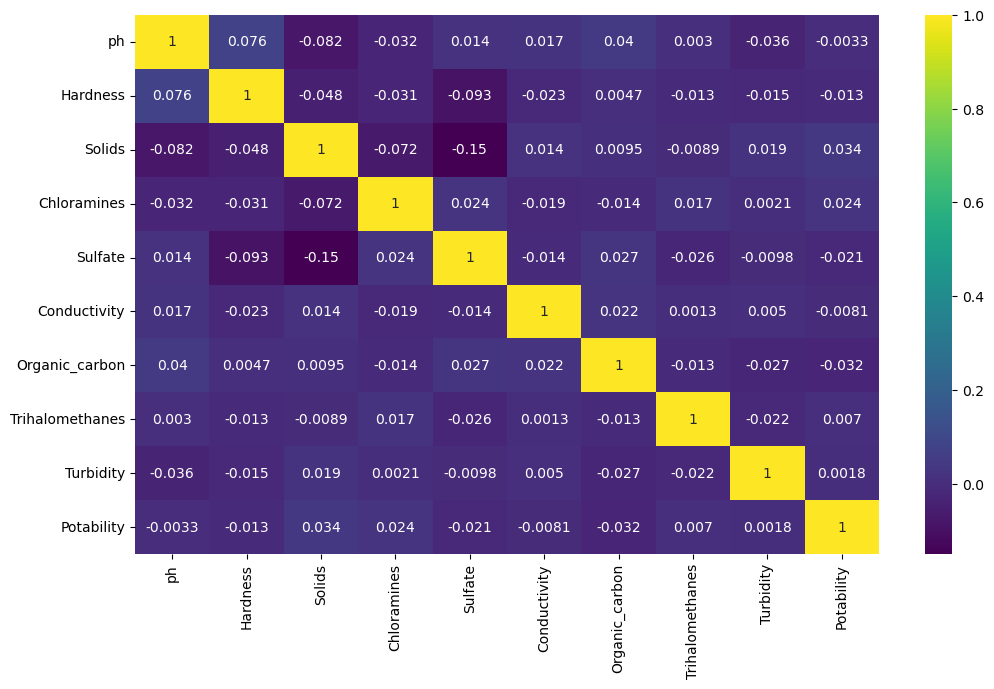

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.ylim(10, 0)

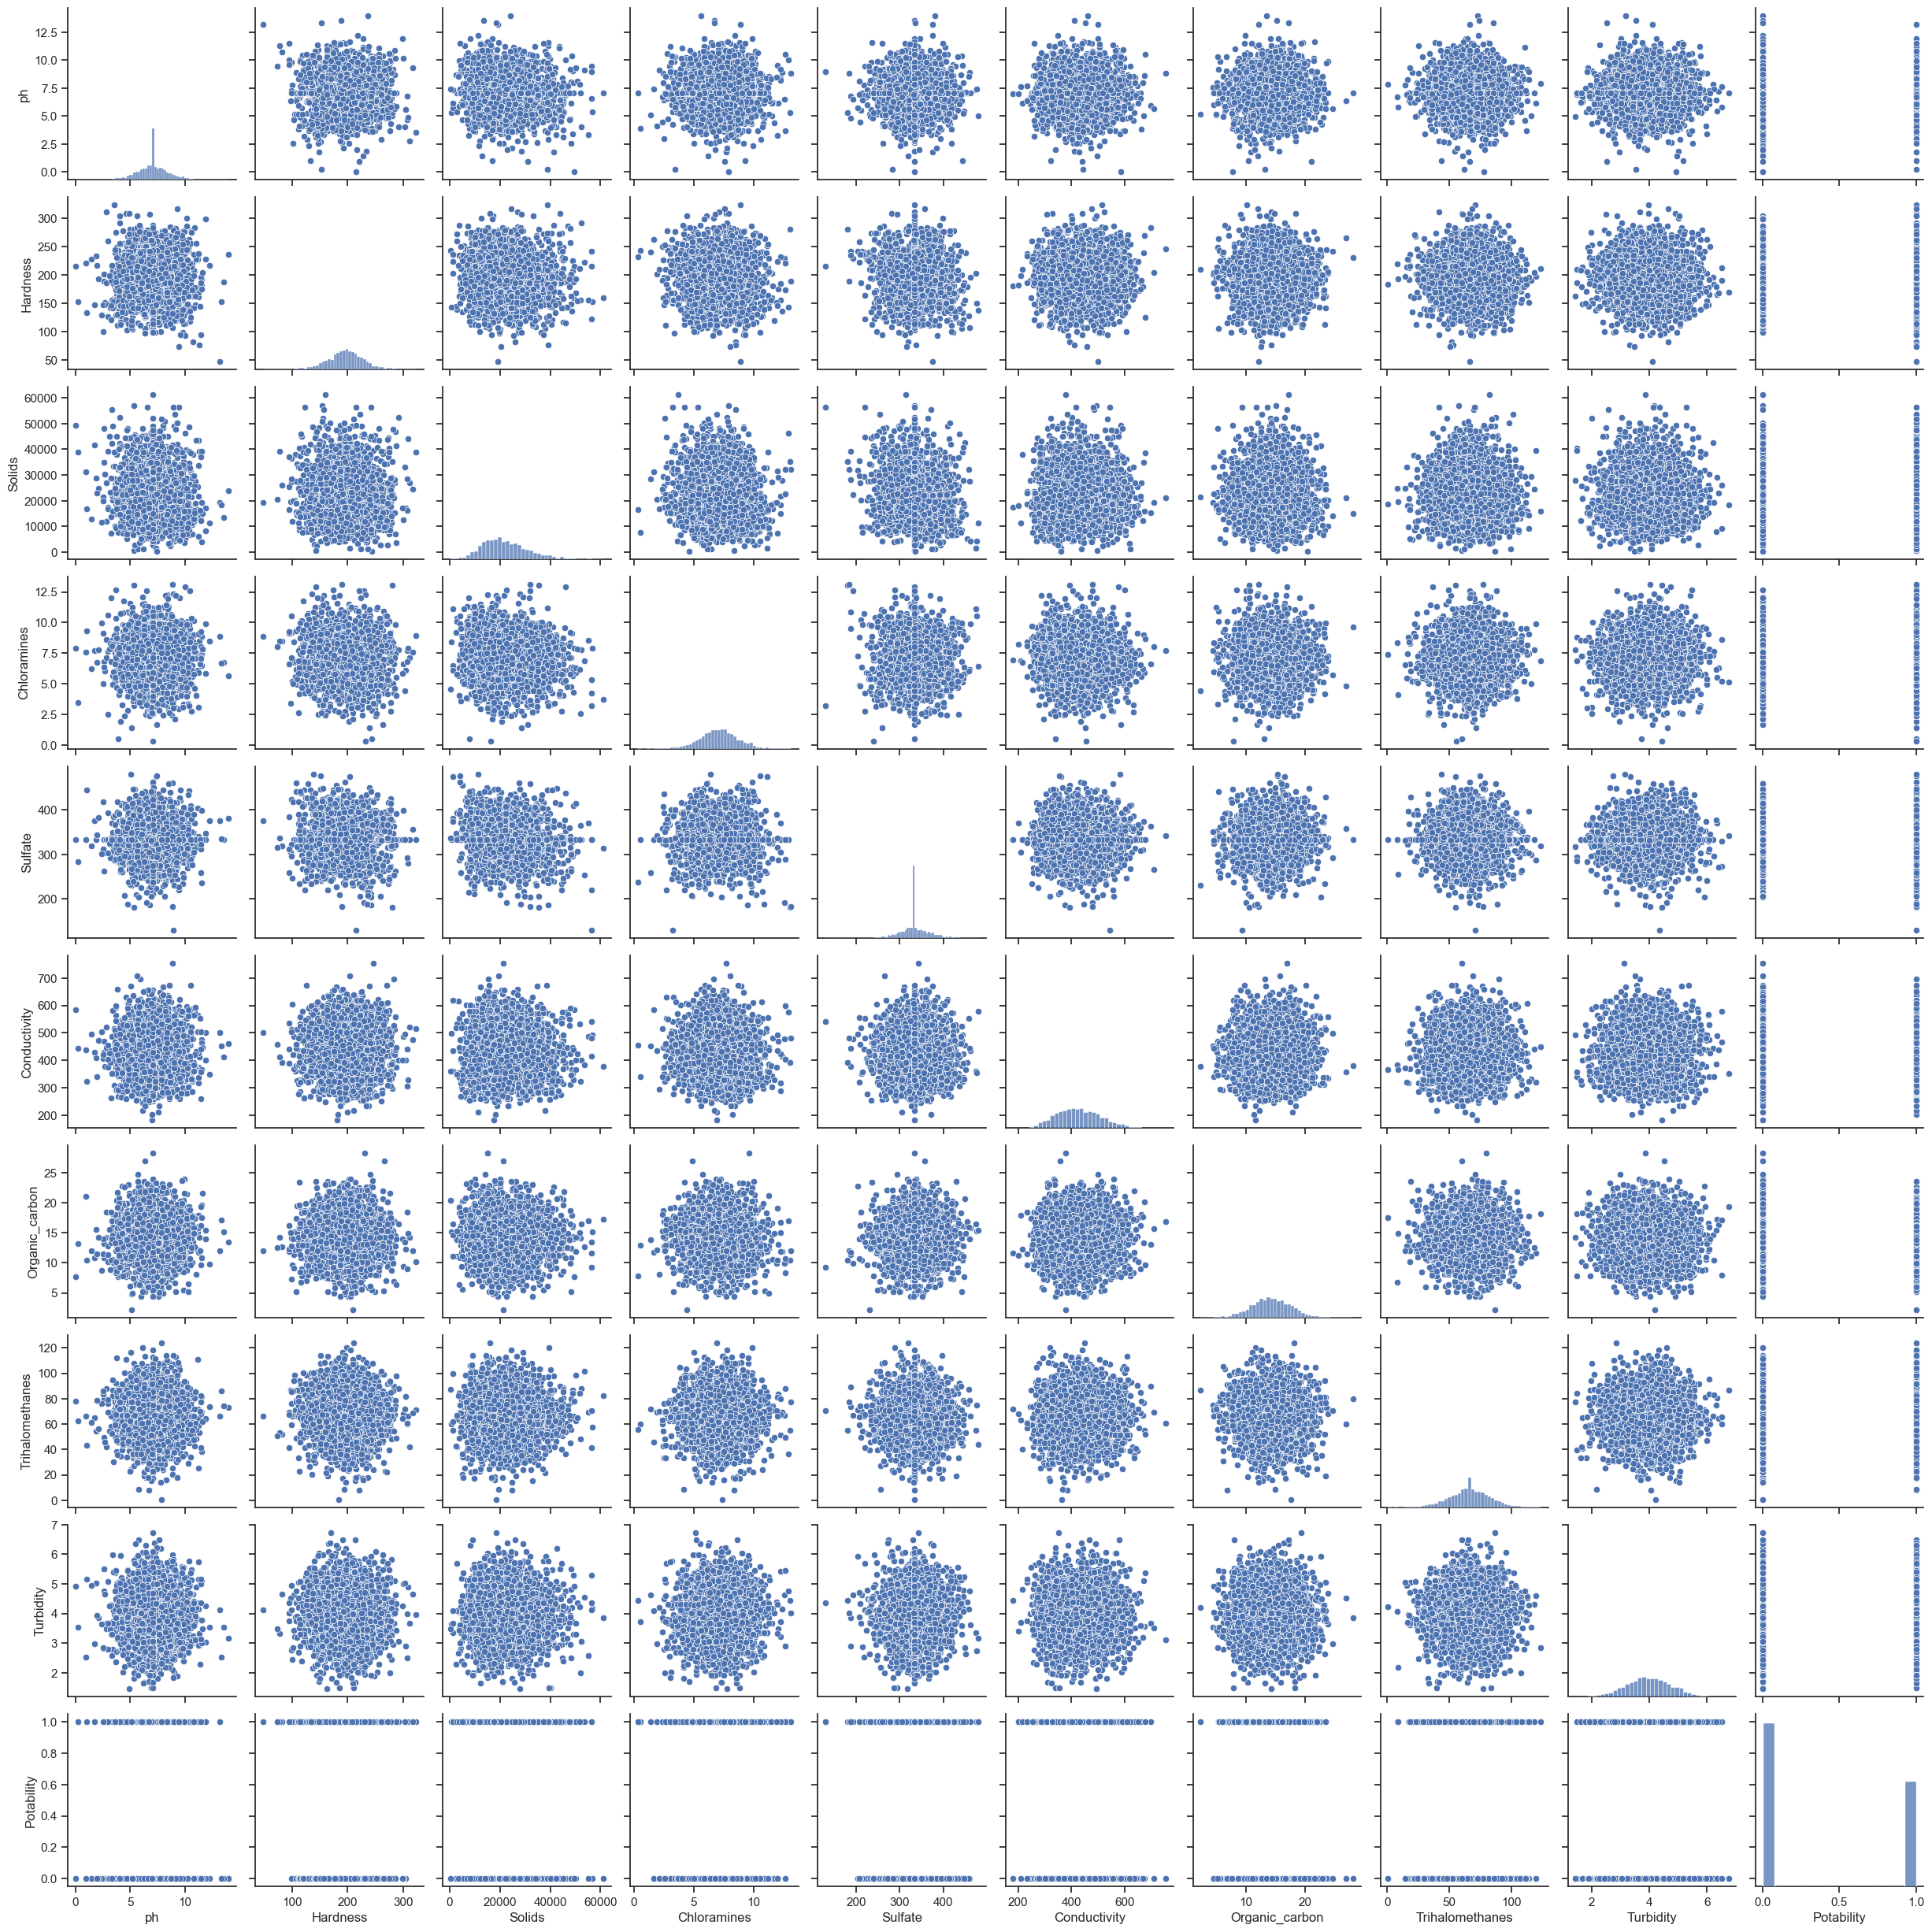

In [9]:
corr_matrix = df.corr()

sns.set(style='ticks')
sns.pairplot(data=df, vars=corr_matrix.columns)
plt.show()

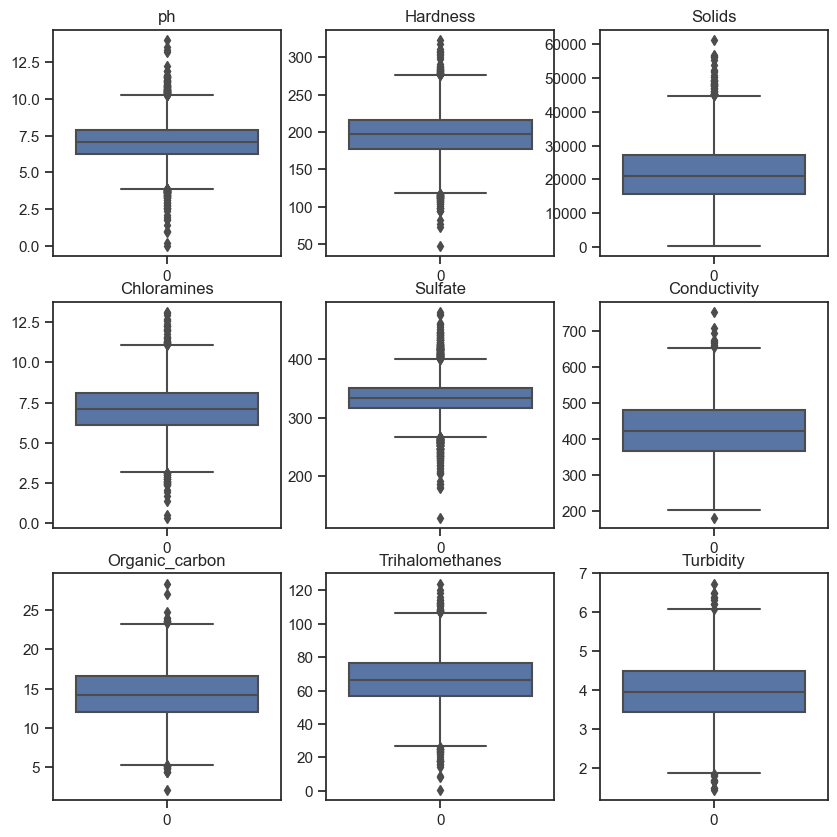

In [10]:
plt.figure(figsize=(10,10))
for i,j in zip(df.columns[:-1], range(len(df.columns)-1)):
    plt.subplot(3,3,j+1).set_title(i)
    sns.boxplot(data = df[i])
plt.show()

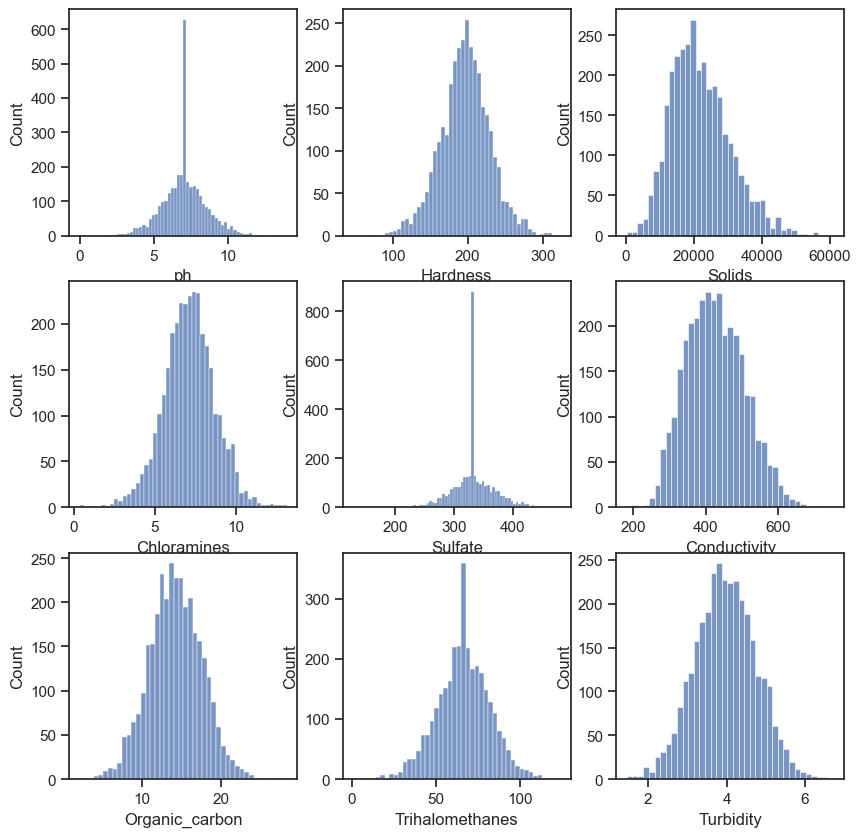

In [11]:
plt.figure(figsize=(10,10))
for i,j in zip(df.columns[:-1], range(len(df.columns)-1)):
    plt.subplot(3,3,j+1)
    sns.histplot(data = df[i])
plt.show()

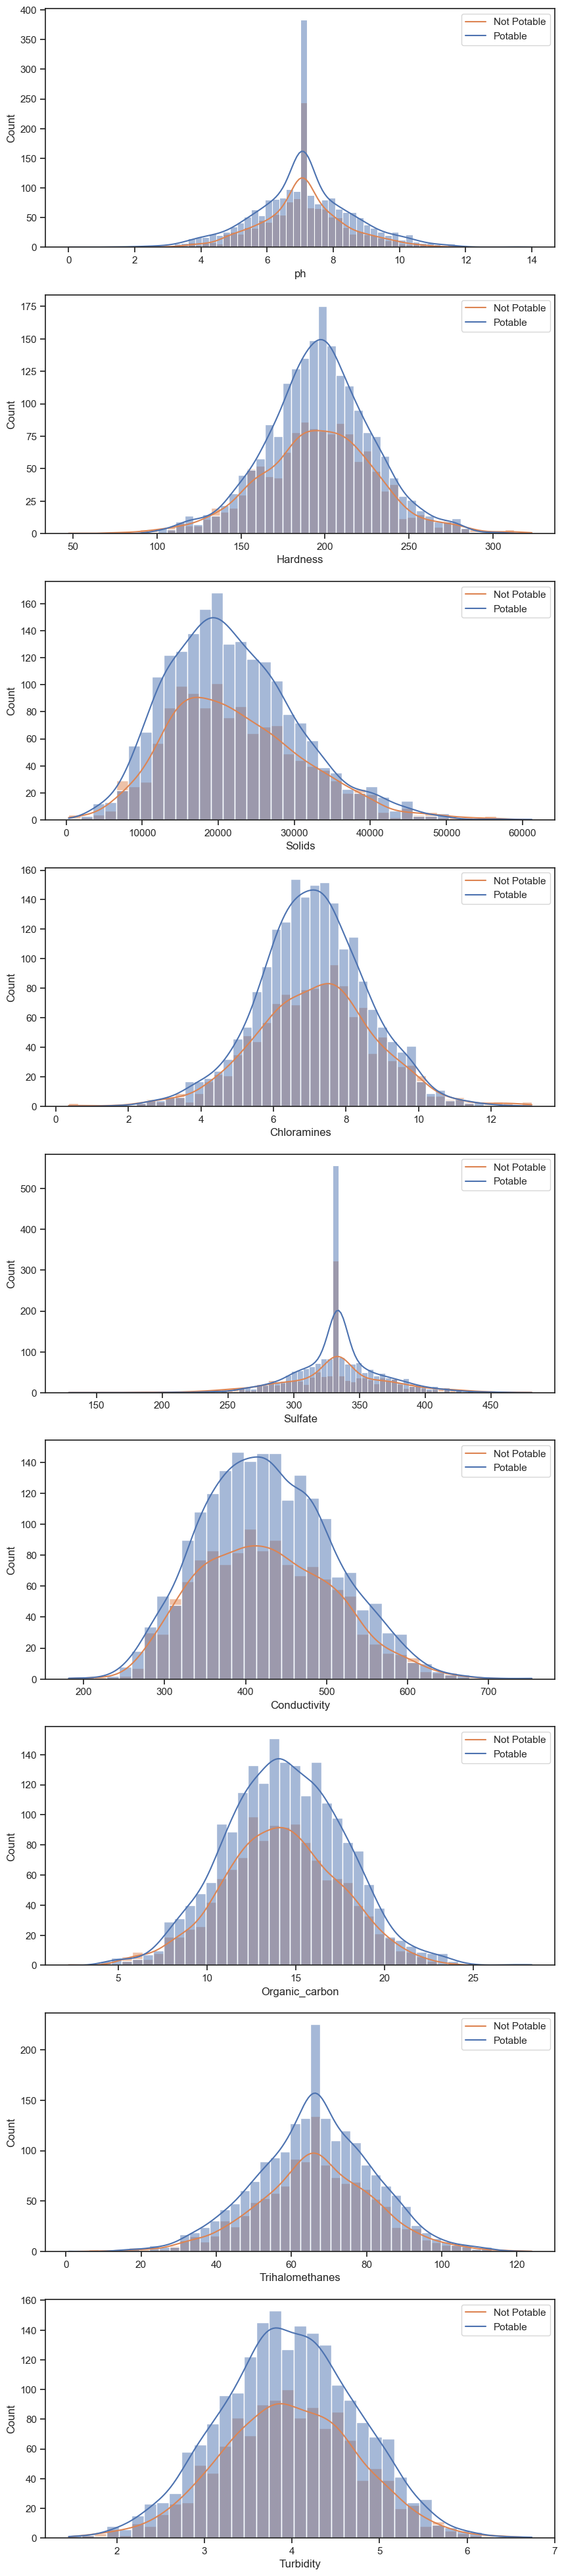

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to visualize
columns_to_visualize = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

# Create subplots for each column
fig, axes = plt.subplots(len(columns_to_visualize), 1, figsize=(10,50))

# Loop through each column and create a distribution plot
for i, column in enumerate(columns_to_visualize):
    sns.histplot(data=df, x=column, hue='Potability', kde=True, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].legend(['Not Potable', 'Potable'])

plt.show()

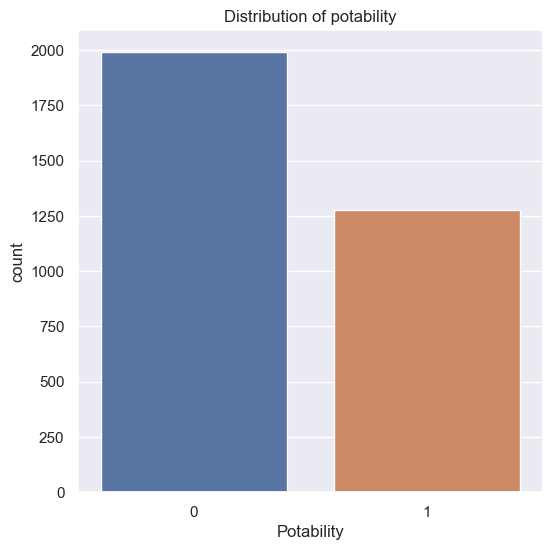

In [13]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(x = df['Potability'])
plt.title('Distribution of potability')
plt.show()

In [14]:
import scipy as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
random.seed(0)
Y = df['Potability']
X = df.drop(columns=['Potability'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
tf.random.set_seed(0)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)
# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model on the training set
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)
# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

history = model.fit(X_train_scaled, y_train, epochs=100)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Epoch 1/100
72/72 [==============================] - 1s 2ms/step - loss: 0.6601 - accuracy: 0.6107 - precision: 0.5062 - recall: 0.1377
Epoch 2/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6592 - precision: 0.6432 - recall: 0.2867
Epoch 3/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6141 - accuracy: 0.6719 - precision: 0.6493 - recall: 0.3483
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6141 - accuracy: 0.6584 - precision: 0.6244 - recall: 0.3147   
Epoch 5/100
72/72 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6811 - precision: 0.6486 - recall: 0.4009
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.6745 - precision: 0.6713 - recall: 0.3270
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5981 - accuracy: 0.6754 - precision: 0.6513 - recall: 0.3639
Epoch 8/100
72/72 [==========================

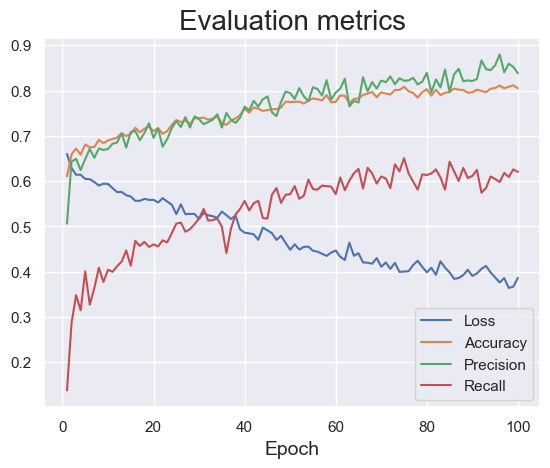

In [15]:
plt.plot(
    np.arange(1, 101), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 101), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 101), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [16]:
# feature scaling
scaler = StandardScaler()
df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']] = scaler.fit_transform(df[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes']])

# splitting the data
X = df.drop('Potability', axis=1)
y = df['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore", category=FutureWarning)

# building the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# predicting on the test set
y_pred = knn.predict(X_test)

# calculating the accuracy
KNN_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', KNN_accuracy)

Accuracy: 0.6340468909276249


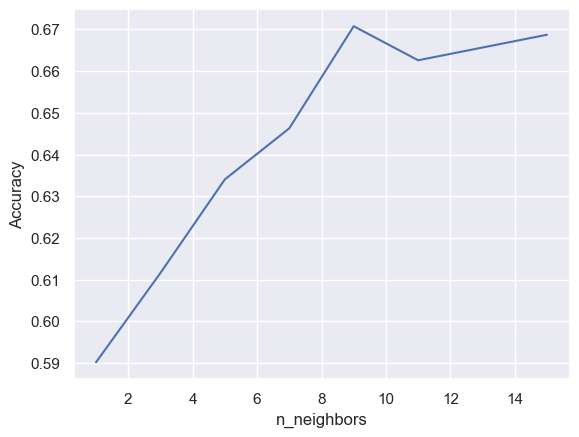

Best n_neighbors: 9
Final accuracy: 0.6707441386340469


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define potential values for n_neighbors
neighbors_list = [1, 3, 5, 7, 9, 11, 13, 15]

# Create an empty list to store accuracy scores
scores = []

# Loop over potential values of n_neighbors
for n in neighbors_list:
    # Build the KNN model
    knn = KNeighborsClassifier(n_neighbors=n)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy score for those predictions
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list of scores
    scores.append(accuracy)

# Plot the scores against the values of n_neighbors
plt.plot(neighbors_list, scores)
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# Choose the value of n_neighbors that gives the highest accuracy score
best_n = neighbors_list[np.argmax(scores)]

# Build the final KNN model with the chosen value of n_neighbors
knn_final = KNeighborsClassifier(n_neighbors=best_n)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)
print('Best n_neighbors:', best_n)
print('Final accuracy:', accuracy_final)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, LSTM
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.exceptions import UndefinedMetricWarning
import warnings


# Split data into features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the number of epochs used in training
num_epochs = 100

# Build the models
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation="relu", input_shape=(X_train.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation="relu"))
cnn_model.add(Dense(1, activation="sigmoid"))
cnn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
cnn_history = cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=num_epochs, verbose=0)

ann_model = Sequential()
ann_model.add(Dense(50, input_dim=X_train.shape[1], activation="relu"))
ann_model.add(Dense(1, activation="sigmoid"))
ann_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
ann_history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(32, return_sequences=True))
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(16, return_sequences=False))
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(1, activation='sigmoid'))
rnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=num_epochs, verbose=0)


mlp_model = Sequential()
mlp_model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


# Train the models
cnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=100, verbose=0)
ann_model.fit(X_train, y_train, epochs=100, verbose=0)
rnn_model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=100, verbose=0)
mlp_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
cnn_pred = cnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
ann_pred = ann_model.predict(X_test)
rnn_pred = rnn_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
mlp_pred = mlp_model.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))


# Evaluate the models
cnn_accuracy = accuracy_score(y_test, cnn_pred.round())
ann_accuracy = accuracy_score(y_test, ann_pred.round())
rnn_accuracy = accuracy_score(y_test, rnn_pred.round())
mlp_accuracy = accuracy_score(y_test, mlp_pred.round())

cnn_precision = precision_score(y_test, cnn_pred.round())
ann_precision = precision_score(y_test, ann_pred.round())
rnn_precision = precision_score(y_test, rnn_pred.round())
mlp_precision = precision_score(y_test, mlp_pred.round())

cnn_recall = recall_score(y_test, cnn_pred.round())
ann_recall = recall_score(y_test, ann_pred.round())
rnn_recall = recall_score(y_test, rnn_pred.round())
mlp_recall = recall_score(y_test, mlp_pred.round())

cnn_rmse = mean_squared_error(y_test, cnn_pred)**0.5
ann_rmse = mean_squared_error(y_test, ann_pred)**0.5
rnn_rmse = mean_squared_error(y_test, rnn_pred)**0.5
mlp_rmse = mean_squared_error(y_test, mlp_pred)**0.5

print(f"CNN Test accuracy: {cnn_accuracy}")
print(f"ANN Test accuracy: {ann_accuracy}")
print(f"RNN Test accuracy: {rnn_accuracy}")
print(f"MLP Test accuracy: {mlp_accuracy}")

print(f"CNN Test precision: {cnn_precision}")
print(f"ANN Test precision: {ann_precision}")
print(f"RNN Test precision: {rnn_precision}")
print(f"MLP Test precision: {mlp_precision}")

print(f"CNN Test recall: {cnn_recall}")
print(f"ANN Test recall: {ann_recall}")
print(f"RNN Test recall: {rnn_recall}")
print(f"MLP Test recall: {mlp_recall}")

print(f"CNN Test rmse: {cnn_rmse}")
print(f"ANN Test rmse: {ann_rmse}")
print(f"RNN Test rmse: {rnn_rmse}")
print(f"MLP Test rmse: {mlp_rmse}")

Epoch 1/100
82/82 [==============================] - 1s 6ms/step - loss: 0.5674 - accuracy: 0.7256 - precision: 0.7527 - recall: 0.4685 - val_loss: 0.5629 - val_accuracy: 0.7339 - val_precision: 0.6939 - val_recall: 0.4416
Epoch 2/100
82/82 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7539 - precision: 0.7933 - recall: 0.5210 - val_loss: 0.6278 - val_accuracy: 0.7355 - val_precision: 0.6835 - val_recall: 0.4675
Epoch 3/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.7585 - precision: 0.7969 - recall: 0.5325 - val_loss: 0.6037 - val_accuracy: 0.7416 - val_precision: 0.6890 - val_recall: 0.4892
Epoch 4/100
82/82 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7608 - precision: 0.8073 - recall: 0.5287 - val_loss: 0.5971 - val_accuracy: 0.7309 - val_precision: 0.6708 - val_recall: 0.4675
Epoch 5/100
82/82 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7532 - precisi

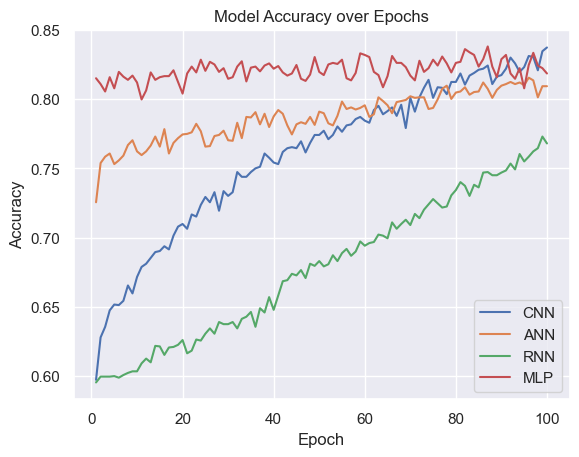

In [20]:

# Plot the accuracy of each model over the number of epochs
plt.plot(range(1, num_epochs+1), cnn_history.history['accuracy'], label='CNN')
plt.plot(range(1, num_epochs+1), ann_history.history['accuracy'], label='ANN')
plt.plot(range(1, num_epochs+1), rnn_history.history['accuracy'], label='RNN')
plt.plot(range(1, num_epochs+1), mlp_history.history['accuracy'], label='MLP')

# Add title, labels, and legend to the plot
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Display the plot
plt.show()


Text(0.5, 1.0, 'Precision Scores of Different Models')

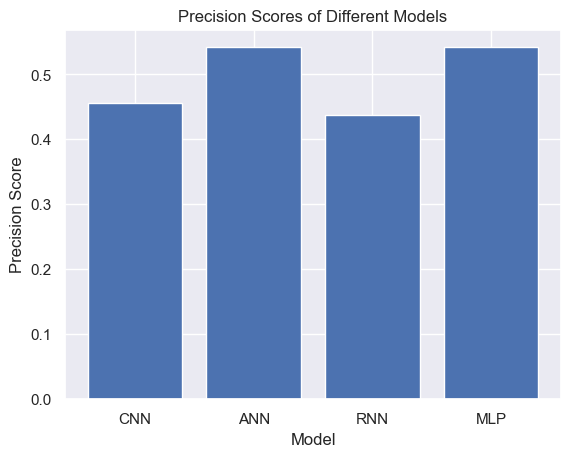

In [21]:
# Plot the precision of each model
fig, ax = plt.subplots()
models = ['CNN', 'ANN', 'RNN','MLP']
precision_scores = [cnn_precision, ann_precision, rnn_precision, mlp_precision]
ax.bar(models, precision_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Precision Score')
ax.set_title('Precision Scores of Different Models')

Text(0.5, 1.0, 'Recall Scores of Different Models')

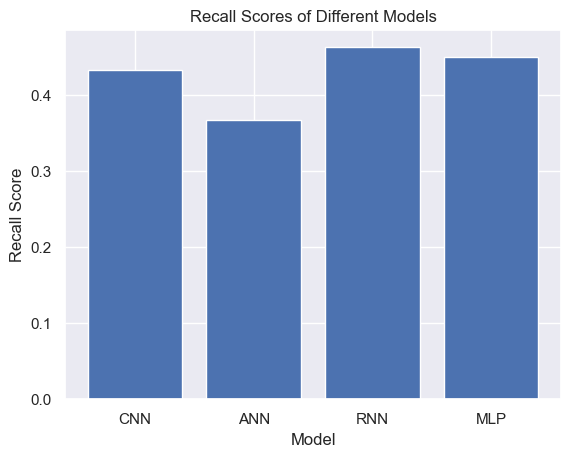

In [22]:
# Plot the recall of each model
fig, ax = plt.subplots()
recall_scores = [cnn_recall, ann_recall, rnn_recall,mlp_recall]
ax.bar(models, recall_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Recall Score')
ax.set_title('Recall Scores of Different Models')

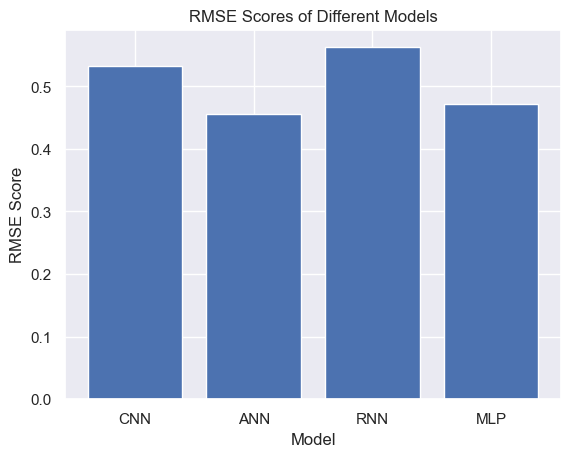

In [23]:

# Plot the RMSE of each model
fig, ax = plt.subplots()
rmse_scores = [cnn_rmse, ann_rmse, rnn_rmse, mlp_rmse]
ax.bar(models, rmse_scores)
ax.set_xlabel('Model')
ax.set_ylabel('RMSE Score')
ax.set_title('RMSE Scores of Different Models')

plt.show()